<a href="https://colab.research.google.com/github/RFJC21/Supervised_Learning_House_Prices/blob/master/House_Prices_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Data science e data analsis: vamos analisar e visualizar os dados, para ver a correlacao que existe entre as variaveis, para criar um algoritmo que com base nas correlcoes entre as varias variaveis independentes, vai tentar prever os precos das casas

#import data from scikitlearn
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas_profiling 

boston_dataset=load_boston()

In [2]:
%matplotlib inline
type(boston_dataset)

sklearn.utils.Bunch

In [3]:
boston_dataset

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [4]:
#atributos dos dados
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [5]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
#um dos atribitos do object e "data"
type(boston_dataset.data)

numpy.ndarray

In [7]:
#ver quantas linhas e colunas
boston_dataset.data.shape

(506, 13)

In [8]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
#os prices estao no target
#prices in K Dollars
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [0]:
#Explroe data with Panda Dataframes, and create a dataframe
data=pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

#add a column with the prices
data['PRICE']=boston_dataset.target


In [11]:
#top rows
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
#quantas rows
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

In [13]:
#clean data
#ver valores nulos
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [14]:
#descricao da dagtaframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [0]:
#Visualize data com MatPlotLib

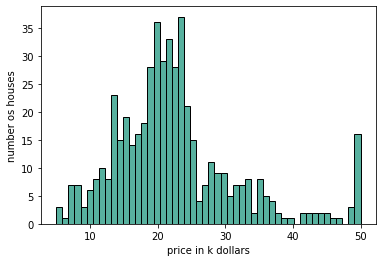

In [16]:
#Histograma com matplotlib
plt.hist(data['PRICE'],bins=50,ec='black',color='#58B19F')
plt.xlabel('price in k dollars')
plt.ylabel('number os houses')
plt.show()

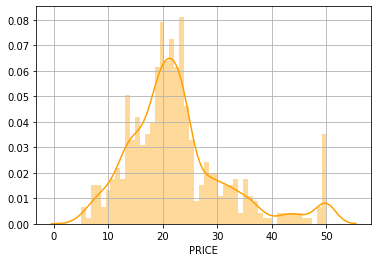

In [17]:
#histograma com seaborn
#linha e a PDF (Probability Density Function)
sns.distplot(data['PRICE'], bins=50,color='#FFA000')
plt.grid()
plt.show()

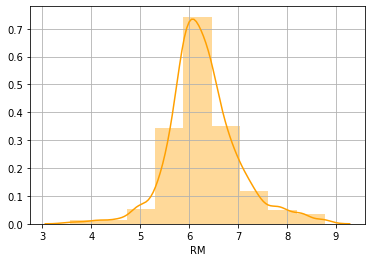

In [18]:
#histograma das divisoes da casa
sns.distplot(data['RM'], bins=9,color='#FFA000')
plt.grid()
plt.show()

In [19]:
#Media de quartos
data['RM'].mean()

6.284634387351787

In [20]:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

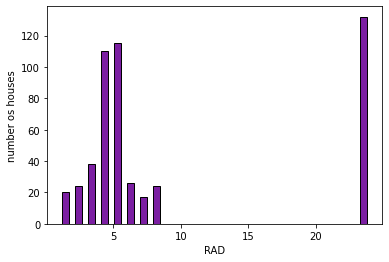

In [21]:
#Histograma com matplotlib da RAD feature, com os 24 valores unicos
plt.hist(data['RAD'],bins=24,ec='black',color='#7B1FA2', rwidth=0.5)
plt.xlabel('RAD')
plt.ylabel('number os houses')
plt.show()

In [22]:
#guardar os valores unicos para fazer o eixo dos x num bar chart
frequency=data['RAD'].value_counts()
frequency.index

Float64Index([24.0, 5.0, 4.0, 3.0, 6.0, 8.0, 2.0, 1.0, 7.0], dtype='float64')

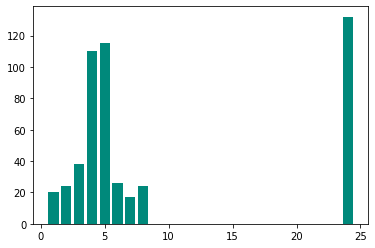

In [23]:
plt.bar(frequency.index,height=frequency, color='#00897b')
plt.show()

In [24]:
#quantas casas perto do rio?
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [25]:
#Descriptive statistics
#lets find the smallest, alrgest,mean and median
print(data['PRICE'].min())
print(data['PRICE'].max())


5.0
50.0


In [26]:
data['PRICE'].max()

50.0

In [27]:
data['PRICE'].mean()

22.532806324110698

In [28]:
data['PRICE'].median()

21.2

In [29]:
#min of the all dataframe
data.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [30]:
data.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICE       50.0000
dtype: float64

In [31]:
#Tudo
#median is the 50%
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [0]:
####Correlation (entre -1 e 1)#######
######queremos a strength e a direction of the correlation######
#tem de ser uma DataFrame

In [33]:
#correlation price vs RM
data['PRICE'].corr(data['RM'])

0.6953599470715393

In [34]:
#prices vs pupil teacher ratio
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375616

In [35]:
#correlation entre todas as variaveis
# this is the Pearson Correlation Coeficient
##Desvantagens##
#esta correlaao so e valida para variaveis continuas, e nao para binarias (1 ou 0); e nao implica obriatoriamente que relacao causa -> efeito; apenas para relacoes lineares
correlation= data.corr()
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [0]:
#esta tabela tem valores simetricos, e so queremos metade
#Importar numpy

In [37]:
mask=np.zeros_like(data.corr())
triangle_indices=np.triu_indices_from(mask)
mask[triangle_indices]=True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

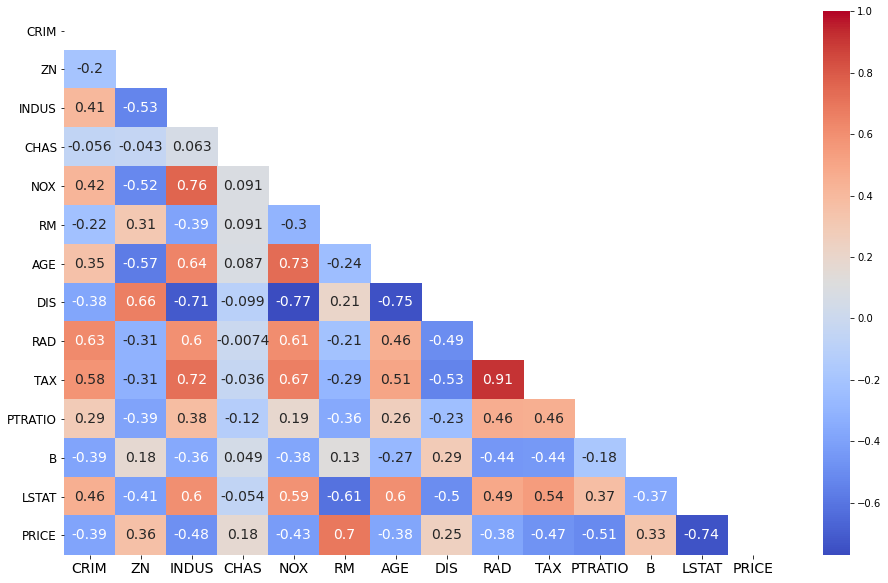

In [38]:
#Heat Map com matplotlib and seaborn
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask=mask, cmap="coolwarm",annot=True, annot_kws={'size':14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

In [0]:
#a correlacao com RAD nao e valida, pois esta variavel so assume valores de 0 e 1

In [0]:
#e importante para o nosso modelo excluir features (variaveis) que nao acrescentem valor (indices baixos)

In [41]:
print(boston_dataset.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

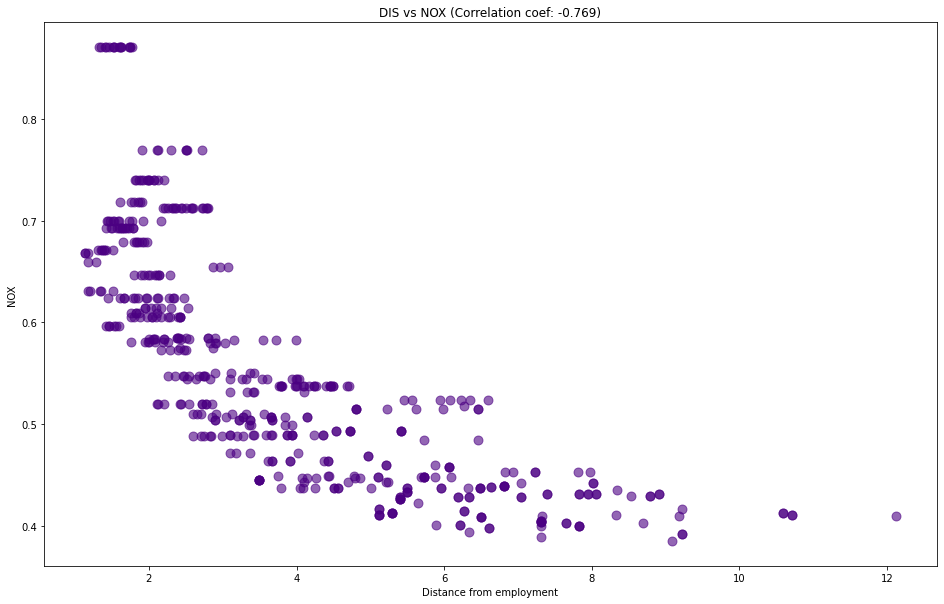

In [42]:
#sctatter plot between polution and distance com MATPLOTLIB
#and also the correlation coeficient no titulo, e mudar casas decimais

nox_dis_corr=round(data['NOX'].corr(data['DIS']),3)

plt.figure(figsize=(16,10))
plt.scatter(x=data['DIS'],y=data['NOX'], alpha=0.6,s=80, color='indigo')
plt.xlabel('Distance from employment')
plt.ylabel('NOX')
plt.title(f'DIS vs NOX (Correlation coef: {nox_dis_corr})')
plt.show()

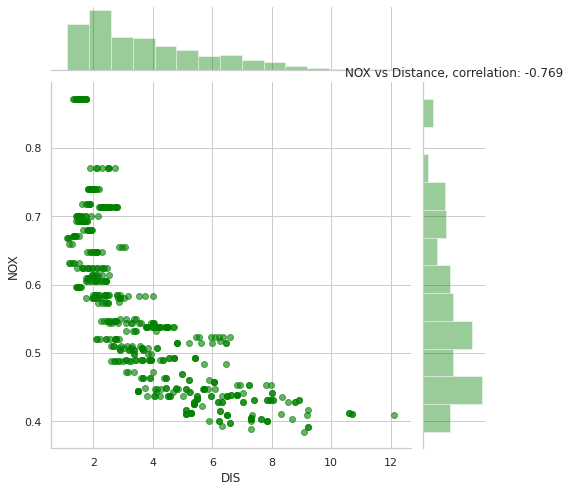

In [43]:
#sctatter plot and histogram between polution and distance com SEABORN
#and also the correlation coeficient no titulo, e mudar casas decimais
#o metudo set e para voltar as definicoes default
sns.set()
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.jointplot(x=data['DIS'],y=data['NOX'],height=7, color='green',joint_kws={'alpha':0.6})
plt.title(f'NOX vs Distance, correlation: {nox_dis_corr}')
plt.show()

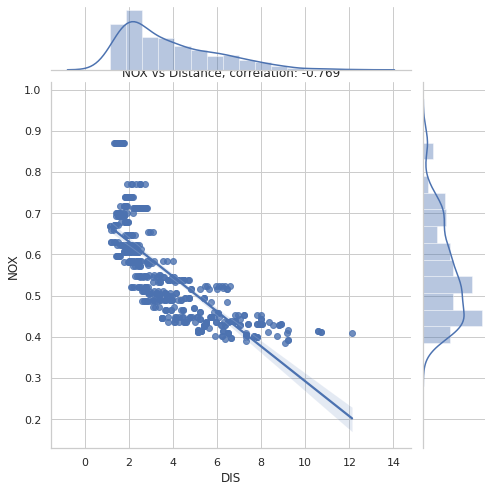

In [44]:
#jointplot com outros valores (KIND)
sns.set()
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.jointplot(x=data['DIS'],y=data['NOX'],height=7, kind='reg')
plt.title(f'NOX vs Distance, correlation: {nox_dis_corr}')
plt.show()

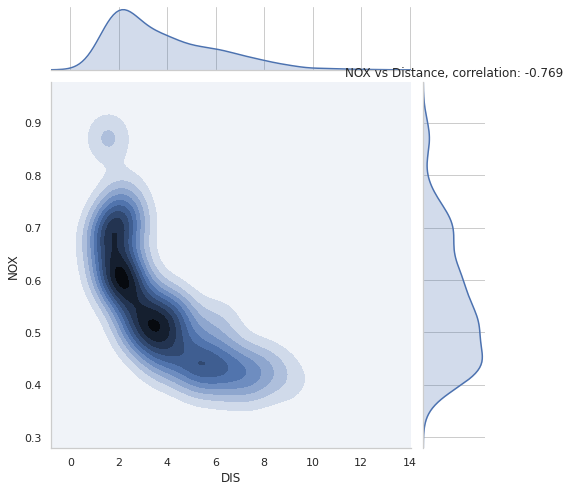

In [45]:
#jointplot com outros valores (KIND)
sns.set()
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.jointplot(x=data['DIS'],y=data['NOX'],height=7, kind='kde')
plt.title(f'NOX vs Distance, correlation: {nox_dis_corr}')
plt.show()

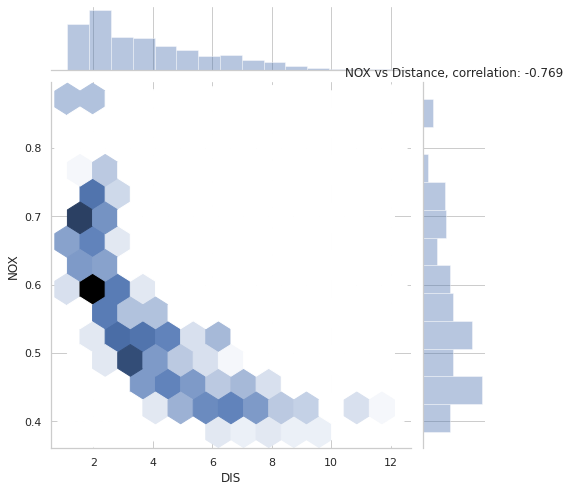

In [46]:
#jointplot com outros valores (KIND)
#scatter plot and histogram at the same time!
sns.set()
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.jointplot(x=data['DIS'],y=data['NOX'],height=7, kind='hex')
plt.title(f'NOX vs Distance, correlation: {nox_dis_corr}')
plt.show()

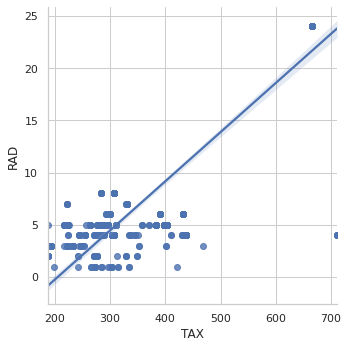

In [47]:
#Linear Regression plot between TAX and RAD, que tem o maior coeficient
#os pontos no canto superior direito estao a influenciar os resultados, incorretamente, pois tem outliers
sns.lmplot(x='TAX',y='RAD',data=data)
plt.show()

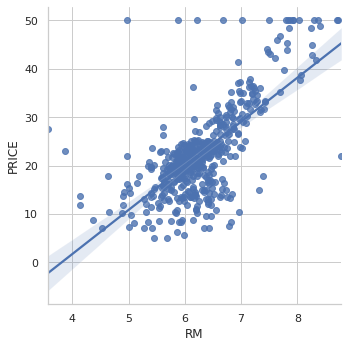

In [48]:
#Linear Regression plot between RM and PRICE, que tem o maior coeficient
#os pontos no canto superior direito estao a influenciar os resultados, incorretamente, pois tem outliers
sns.lmplot(x='RM',y='PRICE',data=data)
plt.show()

# Define and Train Our Model

In [0]:
            ## LETS TRAIN OUR MODEL##
####### MULTIVARIABLE REGRESSION or Multiple Linear Regression#

#inear Regression: y= theta0 (intercept) + theta1*x1 + theta2*x2...
#Our case: PRICE = theta0 + theta1RM + theta2NOX + ...
# x-> explanatory variable (movie budgets)

In [0]:
#Step 1: divide data in trainning data and testing data, using Scikitlearn (from sklearn.model_selection import train_test_split)
#drop method: dataframe with all but price (axis=1 drop a column, 0 to drop a row)
#tuple unpacking

prices = data['PRICE']
features=data.drop('PRICE',axis=1)

#criar  variaveis para guardar os valores de treino e de testing
#test data is 20% of the total. ao fazer isto, o modelo baralha os dados e divide

x_train, x_test, y_train, y_test = train_test_split(features,prices,test_size=0.2, random_state=10 )

In [51]:
# % trainning data
len(x_train)/len(features)

0.7984189723320159

In [52]:
# Step 2: Running the Regression
# from sklearn.linear_model import LinearRegression
# Create Regression Object
# This will train our model

regr=LinearRegression()
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
# Step 3: make some predictions of the sign of theta1, theta2...
# RM: +; NOX: -; PTRATIO: -; CRIME: -; DIS: -; LSTAT: -; CHAS: +

print('Intercept: ', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=x_train.columns, columns=['coef'])


Intercept:  36.533051382824596


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [0]:
#this means: PRICE= 36.5 + 3.1RM -16.3NOX + ...
#this means: the increase of rooms by 1 will increase the price in 3.1kdollars

In [55]:
# r_squared for trainning and test data
print('Trainning data r_squared: ', regr.score(x_train,y_train))
print('Test data r_squared: ', regr.score(x_test,y_test))

Trainning data r_squared:  0.750121534530608
Test data r_squared:  0.6709339839115651


In [0]:
#e mais baixo do test data PORQUE o nosso modelo ainda nao foi calculado (ainda nao viu) os nossos dados de teste!
# Step 4: Deploy and Evaluate our Model
# Evaluate: r_squared; p-values (significance); V.I.F (to test Multicollinearity); BIC(Baysian Information Criterion) (to drop some features/explanatory variables) 

In [57]:
# Step 5?? Data Transformations
# histograma com muitos dados num dos lados -> skew
# como o PRICE tem muitos valores a direito no histogram, vamos aplicar "Log Transformation" que afeta mais estes, os maiores, do que os restantes
# skew normal distribution=0
data['PRICE'].skew()

1.1080984082549072

In [0]:
# Calcular p-value (significance)
# p-value < 0.05 -> Statisticaly Significante
# p-value > 0.05 -> Statisticaly Not Significant

# import Stats: (import statsmodels.api as sm)

### p-values and Evaluating Coefficients ###

In [59]:
# add an intercept
# OLS: Ordinry Least Squares
x_incl_const=sm.add_constant(x_train)

model=sm.OLS(y_train,x_incl_const)

results=model.fit()

results.pvalues

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const      6.066174e-11
CRIM       7.427758e-05
ZN         1.280171e-05
INDUS      9.049512e-01
CHAS       3.314436e-02
NOX        4.940937e-05
RM         1.796544e-11
AGE        2.620778e-01
DIS        1.864060e-11
RAD        8.448603e-06
TAX        1.445667e-03
PTRATIO    1.187235e-08
B          2.811812e-05
LSTAT      9.389685e-25
dtype: float64

In [60]:
#colocar os pvalues numa DataFrame
pd.DataFrame({'coef: ':results.params, 'p-values: ':round(results.pvalues,5)})

#Age and INDUS are NOT SIGNIFICANT

,coef:,p-values:
const,36.533051,0.00000
CRIM,-0.128181,0.00007
ZN,0.063198,0.00001
INDUS,-0.007576,0.90495
CHAS,1.974515,0.03314
NOX,-16.271989,0.00005
RM,3.108456,0.00000
AGE,0.016292,0.26208
DIS,-1.483014,0.00000
RAD,0.303988,0.00001


In [61]:
# Test for Multicollinearity -> quando 2 ou mais variaveis estao fortemente corelacionadas, e assi grande variabilidade no Theta(n)
# Para ver isto -> VIF (Variance Inflation Factor)
# VIF>10 -> Problematic
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# dataframe.values returns an ndarray
variance_inflation_factor(exog=x_incl_const.values, exog_idx=1)

1.7145250443932485

In [62]:
#para calcular para todas as features, vamos fazer um loop e guardar os VIF numa lista
#saber quantas colunas temos
len(x_incl_const.columns)
x_incl_const.shape

(404, 14)

In [63]:
vif_list=[]
for i in range(x_incl_const.shape[1]):
    vif_list.append(variance_inflation_factor(exog=x_incl_const.values,exog_idx=i))
print(vif_list)

[597.5487126763895, 1.7145250443932485, 2.3328224265597597, 3.943448822674638, 1.0788133385000578, 4.410320817897635, 1.8404053075678575, 3.3267660823099394, 4.222923410477865, 7.314299817005058, 8.508856493040817, 1.8399116326514064, 1.3386713255364717, 2.812544292793036]


In [64]:
#colocar a list numa DataFrame
pd.DataFrame({'coef_name :':x_incl_const.columns,'vif: ': np.round(vif_list,2)})

,coef_name :,vif:
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


In [0]:
 ## MODEL SIMPLIFICATION ##
#Lets make our model simplier (simple is better than complex :) )
# we can eliminate some explanatory variables (ROM...)
# For this we use BIC -> test 2 different models, and we chose the lower value

#Try with and without INDUS feature (low correleation and high p-value)

In [86]:
%%time
# Modified Model - Model 2
prices_2 = data['PRICE']
features_2=data.drop(['PRICE','INDUS','AGE'],axis=1)

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(features_2,prices_2,test_size=0.2, random_state=10 )


CPU times: user 5.67 ms, sys: 0 ns, total: 5.67 ms
Wall time: 5.56 ms


In [0]:
# Step 2: Running the Regression
# from sklearn.linear_model import LinearRegression
# Create Regression Object
# This will train our model

regr_2=LinearRegression()
regr_2.fit(x_train_2,y_train_2)
results_2=regr_2.fit(x_train_2,y_train_2)


In [88]:
print('Intercept: ', regr_2.intercept_)
pd.DataFrame(data=regr_2.coef_, index=x_train_2.columns, columns=['coef'])

Intercept:  36.11554990286586


,coef
CRIM,-0.127574
ZN,0.061404
CHAS,2.042927
NOX,-15.177678
RM,3.207983
DIS,-1.546495
RAD,0.300285
TAX,-0.012138
PTRATIO,-0.809111
B,0.011593


In [89]:
prediction_2=regr_2.predict(x_test_2)
print(prediction_2)


[31.05284473 32.10613169 31.00109253 22.22935721 18.80432622 16.48671855
 35.80888542 14.60847448 25.28809958 36.56842337 21.09832331 30.94290039
 27.84735325 33.9701447  34.30467989 39.80621603 24.7362083  22.90002194
 25.54390966 21.66856108 32.50046649 17.70328859 25.16752616 25.19415671
 32.52958139 20.57359078 18.79342114 17.04258729 38.62775547  0.92648959
 32.07492672 31.76151434 25.96327658 24.36119114 20.30156036 19.526714
  3.85324245 35.09370069 27.18363194 27.33654286 34.63932291 29.44659909
 18.12604113 31.64976663 17.42657092 28.10221906 19.32458253 21.79975559
 37.64723158 15.96368236 24.44630054 19.31426515 24.35347951 34.27773908
 26.42609126 34.24702988 20.97100961 19.81178788 19.17398325 24.69322178
 19.74017295 23.34700432 39.66187063 42.00628937 30.54094488 16.71427603
 24.51385275  3.62179312 30.91754522 28.8557925  18.33062367 27.50232949
 19.59693935 25.89448638 24.70949965 10.72500851 38.34032409  8.16277199
 18.21700692 30.40114709 22.64581864 20.81598082 20.1

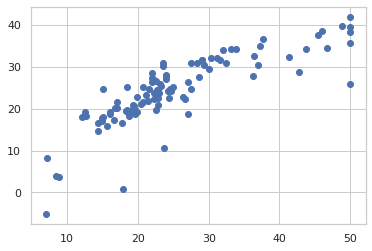

In [90]:
#Evaluate our Model
#scatter plot predicted values vs actual values -> Residuals
plt.scatter(x=y_test_2,y=prediction_2)
plt.show()


In [91]:
# r_squared for trainning and test data
print('Trainning data r_squared: ', regr_2.score(x_train_2,y_train_2))
print('Test data r_squared: ', regr_2.score(x_test_2,y_test_2))

Trainning data r_squared:  0.7493053373352907
Test data r_squared:  0.6763654557506393


In [92]:
# add an intercept
# OLS: Ordinry Least Squares
x_incl_const_2=sm.add_constant(x_train_2)

model_2=sm.OLS(y_train_2,x_incl_const_2)

results_pvalues_2=model_2.fit()

results_pvalues_2.pvalues

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const      8.321653e-11
CRIM       7.737041e-05
ZN         1.833884e-05
CHAS       2.644217e-02
NOX        4.747752e-05
RM         1.315854e-12
DIS        4.380104e-14
RAD        4.967895e-06
TAX        4.677265e-04
PTRATIO    1.103040e-08
B          1.978046e-05
LSTAT      2.986663e-26
dtype: float64

In [93]:
# Significantes: material_distinct e cx_month

#colocar os pvalues numa DataFrame
pd.DataFrame({'coef: ':results_pvalues_2.params, 'p-values: ':round(results_pvalues_2.pvalues,5)})

,coef:,p-values:
const,36.115550,0.00000
CRIM,-0.127574,0.00008
ZN,0.061404,0.00002
CHAS,2.042927,0.02644
NOX,-15.177678,0.00005
RM,3.207983,0.00000
DIS,-1.546495,0.00000
RAD,0.300285,0.00000
TAX,-0.012138,0.00047
PTRATIO,-0.809111,0.00000


In [94]:
# Test for Multicollinearity -> quando 2 ou mais variaveis estao fortemente corelacionadas, e assi grande variabilidade no Theta(n)
# Para ver isto -> VIF (Variance Inflation Factor)
# VIF>10 -> Problematic
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# dataframe.values returns an ndarray
variance_inflation_factor(exog=x_incl_const_2.values, exog_idx=1)


1.710260824980018

In [95]:
vif_list=[]
for i in range(x_incl_const_2.shape[1]):
    vif_list.append(variance_inflation_factor(exog=x_incl_const_2.values,exog_idx=i))
print(vif_list)


[594.2801164152369, 1.710260824980018, 2.2910673904850634, 1.0652684698157913, 3.8266888968832533, 1.7525374736921806, 3.586632207859845, 6.794002960903249, 7.113709113748455, 1.7855734404168242, 1.3305378228630718, 2.44206415809552]


In [96]:
pd.DataFrame({'coef_name :':x_incl_const_2.columns,'vif: ': np.round(vif_list,2)})

,coef_name :,vif:
0,const,594.28
1,CRIM,1.71
2,ZN,2.29
3,CHAS,1.07
4,NOX,3.83
5,RM,1.75
6,DIS,3.59
7,RAD,6.79
8,TAX,7.11
9,PTRATIO,1.79


In [97]:
print('bic 2: ',results_pvalues_2.bic)

bic 2:  2414.269332783494


In [98]:
%%time
## Making Predictions with our Model##
#MSE (Mean Squared Error) MSE=(1/n)Sumatorio (y-y^)^2
#MSE very sensitive with outliers
# Maior R_Squared -> Melhor fit

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.39 µs


In [105]:
x_test_2.head()

,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
305,0.05479,33.0,0.0,0.472,6.616,3.3700,7.0,222.0,18.4,393.36,8.93
193,0.02187,60.0,0.0,0.401,6.800,6.2196,1.0,265.0,15.6,393.37,5.03
65,0.03584,80.0,0.0,0.398,6.290,6.6115,4.0,337.0,16.1,396.90,4.67
349,0.02899,40.0,0.0,0.429,6.939,8.7921,1.0,335.0,19.7,389.85,5.89
151,1.49632,0.0,0.0,0.871,5.404,1.5916,5.0,403.0,14.7,341.60,13.28


In [0]:
House_Prediction=[[0.025,80,1,0.450,6,7,2,300,17,300,5]]


In [113]:
House_Prediction=regr_2.predict(House_Prediction)
print(House_Prediction)

[28.53686248]
